# QWE Churn Assignment

In [5]:
# Load churn case dataset
# Load libaries

import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats 

data= pd.ExcelFile("C:\\Users\\New User\\Google Drive\\Education_\\Rotman (1)\\Fall 2016 Courses\\Predictive Analytics\Assignments\\QWE Churn Assignment\\Churn Case Data.xlsx")
data1 = pd.read_excel(data,"Main Data")

data1.head()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,4,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,5,57,0,43,-1,0,0,0.0,0.0,0,0,9,31


### Exploratory Analysis 

In [134]:
data1.columns

Index(['ID', 'Customer Age (in months)', 'Churn (1 = Yes, 0 = No)',
       'CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0',
       'Support Cases 0-1', 'SP Month 0', 'SP 0-1', 'Logins 0-1',
       'Blog Articles 0-1', 'Views 0-1', 'Days Since Last Login 0-1'],
      dtype='object')

In [7]:
#Checking to see whether there are null values 
data1[data1.isnull()].count()

ID                           0
Customer Age (in months)     0
Churn (1 = Yes, 0 = No)      0
CHI Score Month 0            0
CHI Score 0-1                0
Support Cases Month 0        0
Support Cases 0-1            0
SP Month 0                   0
SP 0-1                       0
Logins 0-1                   0
Blog Articles 0-1            0
Views 0-1                    0
Days Since Last Login 0-1    0
dtype: int64

In [8]:
data1.shape

(5712, 13)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 13 columns):
ID                           5712 non-null int64
Customer Age (in months)     5712 non-null int64
Churn (1 = Yes, 0 = No)      5712 non-null int64
CHI Score Month 0            5712 non-null int64
CHI Score 0-1                5712 non-null int64
Support Cases Month 0        5712 non-null int64
Support Cases 0-1            5712 non-null int64
SP Month 0                   5712 non-null float64
SP 0-1                       5712 non-null float64
Logins 0-1                   5712 non-null int64
Blog Articles 0-1            5712 non-null int64
Views 0-1                    5712 non-null int64
Days Since Last Login 0-1    5712 non-null int64
dtypes: float64(2), int64(11)
memory usage: 580.2 KB


In [9]:
data1.describe()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
count,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000
mean,3170.401436,13.962360,0.049545,87.342087,4.931022,0.704307,-0.010329,0.811349,0.025559,15.669293,0.166317,99.054097,1.876401
std,1830.972286,11.231061,0.217022,66.232741,30.788184,1.727727,1.840724,1.319597,1.464760,41.928883,4.798770,3275.483693,17.696110
min,1.000000,0.000000,0.000000,0.000000,-125.000000,0.000000,-17.000000,0.000000,-4.000000,-293.000000,-75.000000,-28322.000000,-648.000000
25%,1590.750000,5.000000,0.000000,25.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,0.000000
50%,3169.500000,11.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,4757.250000,20.000000,0.000000,139.000000,15.000000,1.000000,0.000000,2.666667,0.000000,23.000000,0.000000,28.000000,3.000000
max,6346.000000,67.000000,1.000000,290.000000,208.000000,32.000000,31.000000,4.000000,4.000000,865.000000,217.000000,230414.000000,61.000000


In [17]:
# Rename columns so there easier to read and work with 
data1.rename(columns = {"Customer Age (in months)":"Customer Age", "Churn (1 = Yes, 0 = No)":"Churn"}, inplace=True)
data1.columns

Index(['ID', 'Customer Age', 'Churn', 'CHI Score Month 0', 'CHI Score 0-1',
       'Support Cases Month 0', 'Support Cases 0-1', 'SP Month 0', 'SP 0-1',
       'Logins 0-1', 'Blog Articles 0-1', 'Views 0-1',
       'Days Since Last Login 0-1'],
      dtype='object')

In [18]:
# What's the average age of customers who churn versus those who do not
grouped = data1.groupby(["Churn"])
grouped["Customer Age"].mean()

Churn
0    13.894824
1    15.257951
Name: Customer Age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF8C64FE80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FF8F251940>]], dtype=object)

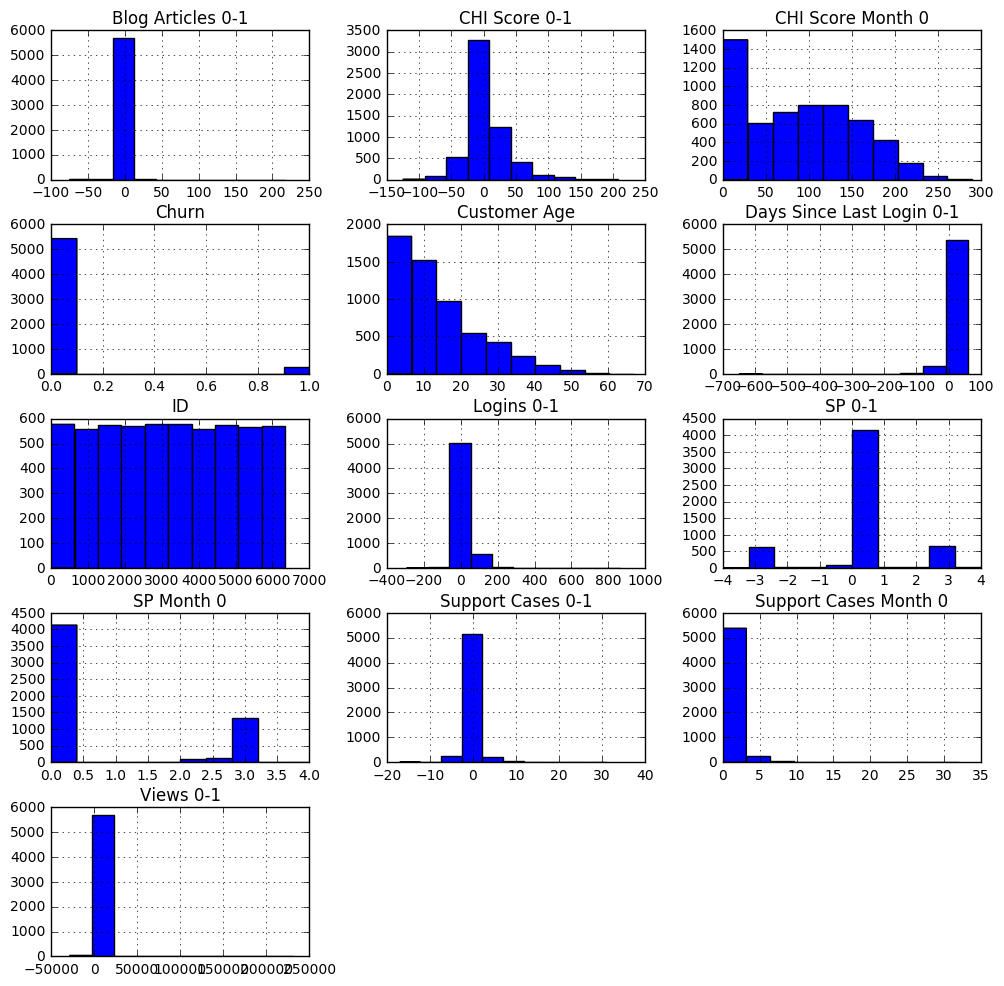

In [77]:
# Histrogram of all variables in data set 
data1.hist(layout=(13,3), figsize=(12,32))


In [90]:
#create correlation matrix
data1.corr()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
ID,1.000000,-0.707722,-0.104069,-0.371289,0.186498,0.047569,0.020709,0.006742,0.040717,0.033055,0.052134,0.005871,-0.038177
Customer Age (in months),-0.707722,1.000000,0.026340,0.304867,-0.156481,-0.075652,-0.010649,-0.040666,-0.005176,-0.041398,-0.034225,0.005454,0.042264
"Churn (1 = Yes, 0 = No)",-0.104069,0.026340,1.000000,-0.084235,-0.064532,-0.044513,0.005226,-0.057018,-0.007781,-0.050328,-0.014471,-0.016733,0.063192
CHI Score Month 0,-0.371289,0.304867,-0.084235,1.000000,0.200995,0.310546,-0.013292,0.377100,-0.003724,0.317783,0.047293,0.040631,-0.110397
CHI Score 0-1,0.186498,-0.156481,-0.064532,0.200995,1.000000,0.258945,0.288979,0.225636,0.245015,0.420891,0.231601,-0.010206,0.035709
Support Cases Month 0,0.047569,-0.075652,-0.044513,0.310546,0.258945,1.000000,0.496217,0.651881,0.285760,0.345737,0.083737,0.027746,-0.045117
Support Cases 0-1,0.020709,-0.010649,0.005226,-0.013292,0.288979,0.496217,1.000000,0.256554,0.516054,0.276532,0.085850,-0.012670,0.009363
SP Month 0,0.006742,-0.040666,-0.057018,0.377100,0.225636,0.651881,0.256554,1.000000,0.562664,0.308720,0.044183,0.027596,-0.066103
SP 0-1,0.040717,-0.005176,-0.007781,-0.003724,0.245015,0.285760,0.516054,0.562664,1.000000,0.208201,0.042856,-0.006105,0.022576
Logins 0-1,0.033055,-0.041398,-0.050328,0.317783,0.420891,0.345737,0.276532,0.308720,0.208201,1.000000,0.149514,0.031481,-0.028088


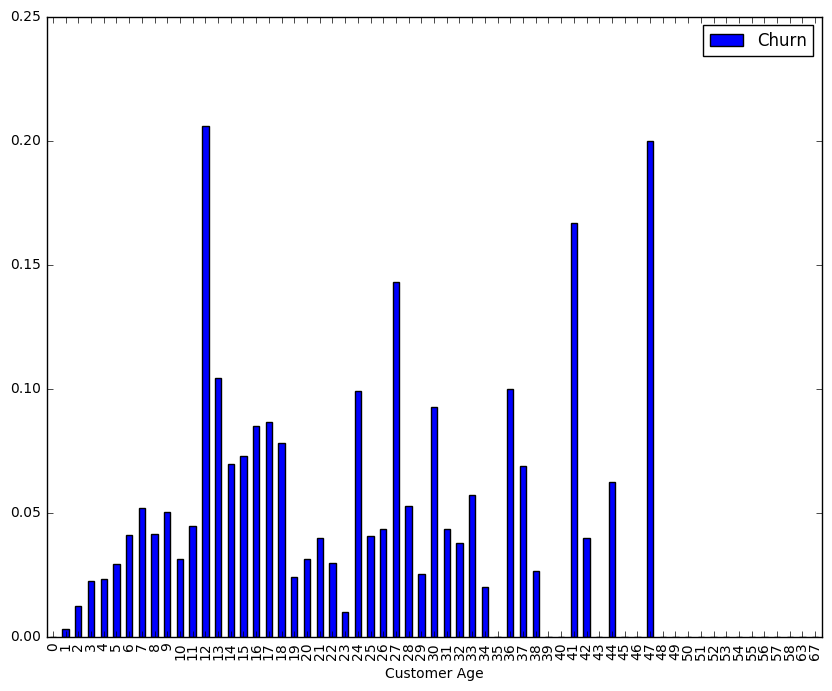

In [19]:
# A deeper dive into age and churn 
%matplotlib inline 
data1.groupby(["Customer Age"]).agg({"Churn":"mean"}).plot(kind='bar',figsize=[10,8])

###  12 & 47 are both ~ 20% churn. 
- 12, 27, 41 & 47 months have the highest Churn (> 13%) 


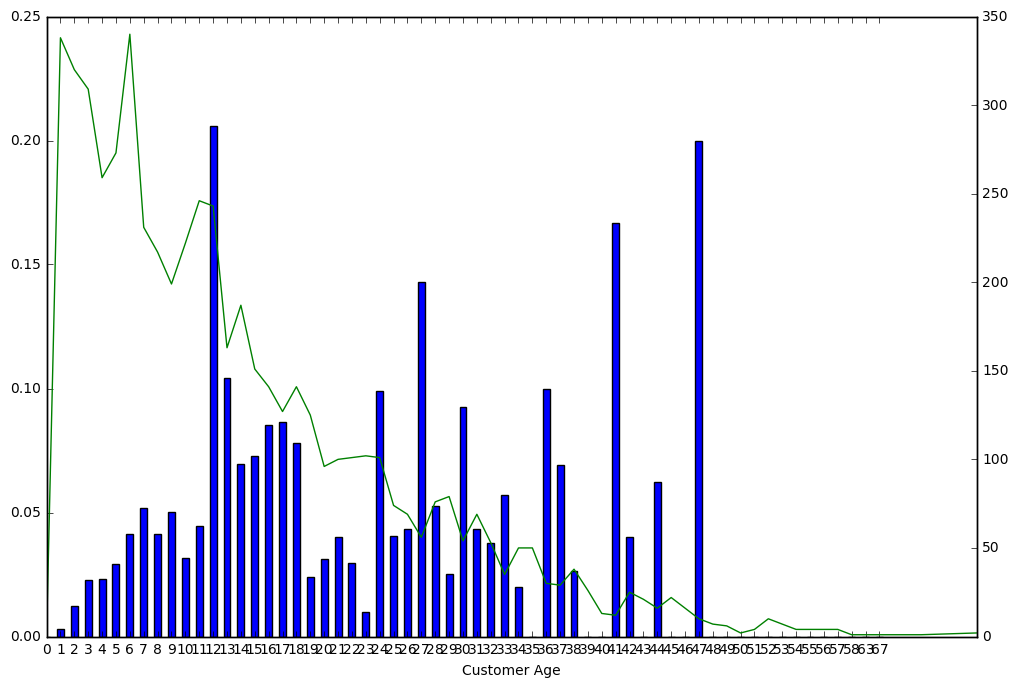

In [69]:
# Graphing Churn rate with the number of customers at each age to see where the greatest impact to the business could be 
df = data1.groupby(["Customer Age"]).agg({"Churn" : {"Churn Mean": 'mean', 'Churn Count': 'count'}})
df['Churn', 'Churn Mean'].plot(kind='bar', figsize=[12,8])
df['Churn', 'Churn Count'].plot(secondary_y=True, style='g')

- when we graph churn rate by month against the number of customers we can see that addressing earlier months where we see high churn would make most sense. 
- A counter argument: It would be interesting however, to see the lifetime value of older customers. If they are higher it may make more sense to address this problem first. 

## Modelling: random forest classifier to determine features of interest 

In [40]:
# Load scikit's random forest classifier library 
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Create tain dataset 
# Creating 'is_train' column to separate dataset into train and validation
data1['is_train'] = np.random.uniform(0,1,len(data1)) <= .75 
data1.head(5)

,Churn,ID,Customer Age,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,is_train
0,0,1,67,0,0,0,0,0.0,0.0,0,0,0,31,True
1,0,2,67,62,4,0,0,0.0,0.0,0,0,-16,31,True
2,0,3,55,0,0,0,0,0.0,0.0,0,0,0,31,True
3,0,4,63,231,1,1,-1,3.0,0.0,167,-8,21996,0,False
4,0,5,57,43,-1,0,0,0.0,0.0,0,0,9,31,False


In [42]:
#re-arrange dataset to model 
data1 = data1[['Churn','is_train','ID', 'Customer Age','CHI Score Month 0', 'CHI Score 0-1',
       'Support Cases Month 0', 'Support Cases 0-1', 'SP Month 0', 'SP 0-1',
       'Logins 0-1', 'Blog Articles 0-1', 'Views 0-1',
       'Days Since Last Login 0-1']]


In [43]:
# create training and test dataset 

train = data1[data1["is_train"] == True]
test = data1[data1['is_train']==False]

In [44]:
# Show the number of observations for test and training dataframes 
print('Number of observations in the training data:',len(train))
print('Number of obersvations in the test data:', len(test))

Number of observations in the training data: 4243
Number of obersvations in the test data: 1469


In [47]:
# Create a list of the feature columns's name
features = data1.columns[3:]

features


Index(['Customer Age', 'CHI Score Month 0', 'CHI Score 0-1',
       'Support Cases Month 0', 'Support Cases 0-1', 'SP Month 0', 'SP 0-1',
       'Logins 0-1', 'Blog Articles 0-1', 'Views 0-1',
       'Days Since Last Login 0-1'],
      dtype='object')

In [48]:
# Create a random forest classifier, By concention, clf mean 'classifier' 
clf = RandomForestClassifier()

# Train the classifier to take the training freatures and learn how they relate 
# to the training of y (Churn)
clf.fit(train[features] , train['Churn'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
# Applly classifier data we trained to the test data
clf.predict(test[features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
# See the first 10 predicitions from test dataset
clf.predict_proba(test[features])[0:10]

array([[ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       [ 1. ,  0. ]])

In [51]:
# create series of predictions 
preds = clf.predict(test[features])

In [52]:
#create confusion matrix 
pd.crosstab(test["Churn"], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,1399,3
1,63,4


In [53]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('Customer Age', 0.1913136270743527),
 ('CHI Score Month 0', 0.16273202444189727),
 ('CHI Score 0-1', 0.13292474645788327),
 ('Support Cases Month 0', 0.016368802015765887),
 ('Support Cases 0-1', 0.023810208011003434),
 ('SP Month 0', 0.012665943736410815),
 ('SP 0-1', 0.019922762452761901),
 ('Logins 0-1', 0.12570399476481767),
 ('Blog Articles 0-1', 0.03729445256268453),
 ('Views 0-1', 0.17222646115112314),
 ('Days Since Last Login 0-1', 0.10503697733129935)]

In [54]:
importances = clf.feature_importances_
indices = np.argsort(importances)


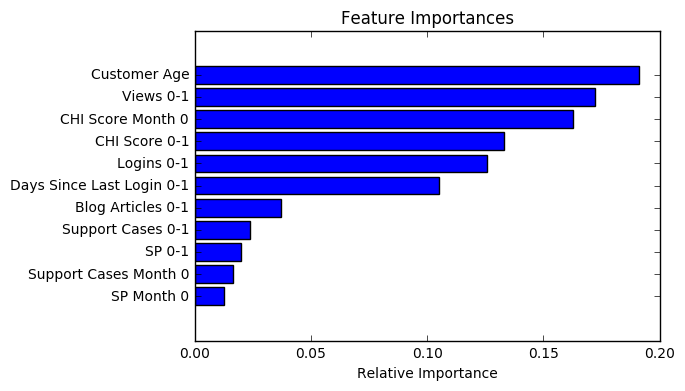

In [55]:
#create plot of feature importance 

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### Now that we have an idea of what features may be the most influential, let's create logistic model using the top 6 features 

In [67]:
# load libraries

import statsmodels.api as sm
import pylab as pl 



In [68]:
# prep dataset 
data2 = data1 
data2 = data2[['Churn', 'ID', 'is_train', 'Customer Age', 'Views 0-1','CHI Score Month 0','CHI Score 0-1','Logins 0-1', 'Days Since Last Login 0-1' ]]

In [69]:
# add intercept 

data2["intercept"] = 1.0


C:\Users\New User\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [72]:
train2 = data2[data2["is_train"] == True]
test2 = data2[data2['is_train']==False]

In [73]:
top_features = data2.columns[3:]
top_features

Index(['Customer Age', 'Views 0-1', 'CHI Score Month 0', 'CHI Score 0-1',
       'Logins 0-1', 'Days Since Last Login 0-1', 'intercept'],
      dtype='object')

In [74]:
logit = sm.Logit(train2['Churn'], train2[top_features])

#fit the model

result = logit.fit()


Optimization terminated successfully.
         Current function value: 0.191545
         Iterations 7


In [75]:
print(result.summary()) 

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4243
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Jun 2017   Pseudo R-squ.:                 0.04788
Time:                        15:28:15   Log-Likelihood:                -812.73
converged:                       True   LL-Null:                       -853.60
                                        LLR p-value:                 1.556e-15
                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Customer Age                  0.0108      0.007      1.644      0.100        -0.002     0.024
Views 0-1                    -0.0001   4.38e-05     -3.377      0.001        -0.000 -6

In [78]:
test2['Churn_Pred'] = result.predict(test2[top_features])


C:\Users\New User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [85]:
test2.sort_values('Churn', ascending=False).head(100)

,Churn,ID,is_train,Customer Age,Views 0-1,CHI Score Month 0,CHI Score 0-1,Logins 0-1,Days Since Last Login 0-1,intercept,Churn_Pred
3590,1,3978,False,9,13,0,-25,-6,-7,1.0,0.067168
500,1,549,False,12,344,36,-5,5,-31,1.0,0.027060
706,1,780,False,9,1,136,35,42,0,1.0,0.022987
2316,1,2578,False,18,190,145,34,54,3,1.0,0.025070
2346,1,2611,False,14,7,49,-36,-4,-53,1.0,0.021745
2362,1,2628,False,28,712,92,-27,33,3,1.0,0.057685
2370,1,2636,False,25,0,0,0,0,31,1.0,0.142165
637,1,706,False,12,33,122,-16,7,-2,1.0,0.038940
2383,1,2650,False,27,52,89,0,-23,2,1.0,0.052506
2414,1,2682,False,26,-8,91,25,-12,0,1.0,0.039713


Next steps: more feature engineering
- dummy variable to capture end of contract month (multiple of 6 or 12)
- dummy variable to capture decreasing activity (if neg than 1)
- days since login is unclear (no data dicitionary to clarify)
    

In [ ]:
# create test dataset 
test = pd.ExcelFile("C:\\Users\\New User\\Google Drive\\Education_\\Rotman (1)\\Fall 2016 Courses\\Predictive Analytics\Assignments\\QWE Churn Assignment\\Churn Case Data.xlsx")
test = pd.read_excel(test,"Test Data")
test.rename(columns = {"Customer Age (in months)":"Customer Age", "Churn (1 = Yes, 0 = No)":"Churn"}, inplace=True)